Epoch 1/100
13/13 [==============================] - 2s 3ms/step - loss: 100.3911
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 99.8839
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 99.4169
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 98.9158
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 98.4359
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 97.9611
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 97.4831
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 97.0202
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 96.4973
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 96.0432
Epoch 11/100
13/13 [==============================] - 0s 3ms/step - loss: 95.5611
Epoch 12/100
13/13 [==============================] - 0s 3ms/step - loss: 95.0254
Epoch 13/100
13/13 [====

2/2 [==============================] - 0s 6ms/step - loss: 0.6936
MSE: 0.6936395168304443
2/2 [==============================] - 0s 4ms/step


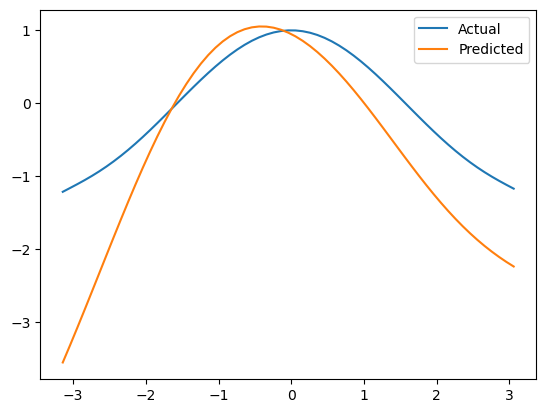

Tue Mar 21 01:52:07 2023    restats

         4336385 function calls (4206543 primitive calls) in 7.229 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    7.233    7.233 {built-in method builtins.exec}
        1    0.000    0.000    7.233    7.233 <string>:1(<module>)
        1    0.000    0.000    7.233    7.233 4041056397.py:12(run_code)
     28/7    0.003    0.000    7.072    1.010 traceback_utils.py:59(error_handler)
        1    0.035    0.035    5.956    5.956 training.py:1303(fit)
8912/3240    0.021    0.000    5.936    0.002 traceback_utils.py:138(error_handler)
     1304    0.028    0.000    5.509    0.004 polymorphic_function.py:852(__call__)
     1304    0.008    0.000    5.430    0.004 polymorphic_function.py:899(_call)
1307/1306    0.014    0.000    4.307    0.003 tracing_compiler.py:129(__call__)
     1311    0.022    0.000    2.987    0.002 monomorphic_function.py:1667(_call_flat

In [7]:
import cProfile
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Define the Taylor series of cos(x) up to the 5th order
def taylor_cos(x):
    return 1 - (x ** 2)/2 + (x ** 4)/24 - (x ** 6)/720

def run_code():
    # Generate training data
    x_train = np.arange(-2*np.pi, 2*np.pi, 0.1)
    y_train = taylor_cos(x_train)

    # Reshape input data to match the expected input shape of LSTM
    x_train = x_train.reshape((len(x_train), 1, 1))

    # Define LSTM model architecture
    model = Sequential()
    model.add(LSTM(10, input_shape=(1, 1)))
    model.add(Dense(1))

    # Compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Fit the model to the training data
    model.fit(x_train, y_train, epochs=100, batch_size=10)

    # Evaluate the model on new data
    x_test = np.arange(-np.pi, np.pi, 0.1)
    y_test = taylor_cos(x_test)
    x_test = x_test.reshape((len(x_test), 1, 1))
    mse = model.evaluate(x_test, y_test)
    print('MSE:', mse)

    # Generate predictions using the model
    y_pred = model.predict(x_test)

    # Plot the results
    plt.plot(x_test[:, 0, 0], y_test, label='Actual')
    plt.plot(x_test[:, 0, 0], y_pred, label='Predicted')
    plt.legend()
    plt.show()

cProfile.run('run_code()', 'restats')
import pstats
p = pstats.Stats('restats')
p.strip_dirs().sort_stats('cumulative').print_stats()
